## Exploración de Datos

In [81]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Carga de datos
df = pd.read_csv("houses_to_rent_v2.csv")

# # Visualización de la matriz de correlación
# correlation_matrix = df.corr()
# plt.figure(figsize=(10, 6))
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
# plt.title("Matriz de Correlación")
# plt.show()

In [82]:
df.shape

(10692, 13)

In [83]:
df.columns

Index(['city', 'area', 'rooms', 'bathroom', 'parking spaces', 'floor',
       'animal', 'furniture', 'hoa (R$)', 'rent amount (R$)',
       'property tax (R$)', 'fire insurance (R$)', 'total (R$)'],
      dtype='object')

In [84]:
df.isnull().sum()

city                   0
area                   0
rooms                  0
bathroom               0
parking spaces         0
floor                  0
animal                 0
furniture              0
hoa (R$)               0
rent amount (R$)       0
property tax (R$)      0
fire insurance (R$)    0
total (R$)             0
dtype: int64

array([[<Axes: title={'center': 'area'}>,
        <Axes: title={'center': 'rooms'}>,
        <Axes: title={'center': 'bathroom'}>],
       [<Axes: title={'center': 'parking spaces'}>,
        <Axes: title={'center': 'hoa (R$)'}>,
        <Axes: title={'center': 'rent amount (R$)'}>],
       [<Axes: title={'center': 'property tax (R$)'}>,
        <Axes: title={'center': 'fire insurance (R$)'}>,
        <Axes: title={'center': 'total (R$)'}>]], dtype=object)

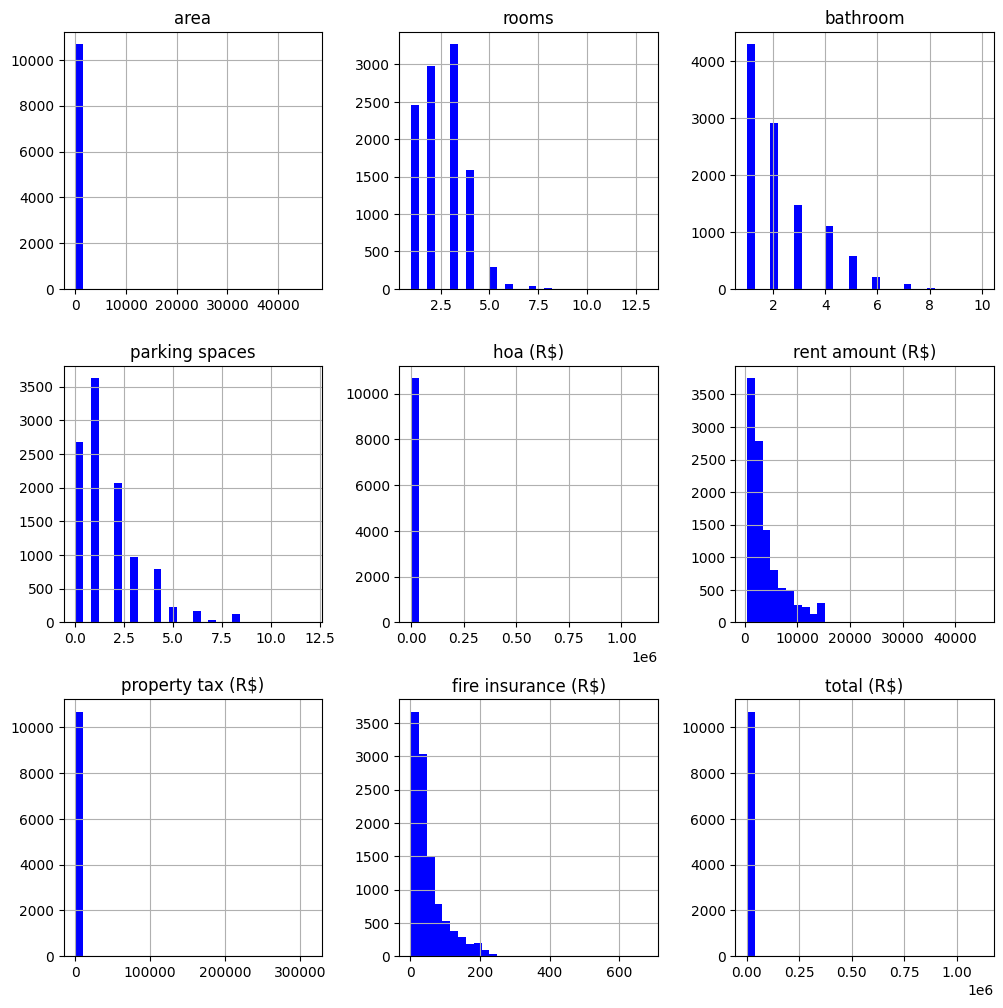

In [85]:
df[df.columns].hist(bins=30, figsize=(12, 12), color="b")

## Preprocesamiento de Datos

In [86]:
# Tratar valores faltantes
df = df.dropna()

label_encoder = LabelEncoder()

categoricas = ["city", "floor", "animal", "furniture"]

for column in categoricas:
    df[column] = label_encoder.fit_transform(df[column])

df

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,4,70,2,1,1,32,0,0,2065,3300,211,42,5618
1,4,320,4,4,0,13,0,1,1200,4960,1750,63,7973
2,2,80,1,1,1,31,0,1,1000,2800,0,41,3841
3,2,51,2,1,0,12,0,1,270,1112,22,17,1421
4,4,25,1,1,0,1,1,1,0,800,25,11,836
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10687,2,63,2,1,1,29,1,0,402,1478,24,22,1926
10688,4,285,4,4,4,9,0,1,3100,15000,973,191,19260
10689,3,70,3,3,0,33,1,0,980,6000,332,78,7390
10690,3,120,2,2,2,33,0,0,1585,12000,279,155,14020


##  División de Datos

In [98]:
X = df.drop("total (R$)", axis=1)
y = df["total (R$)"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),total (R$)
0,4,70,2,1,1,32,0,0,2065,3300,211,5618
1,4,320,4,4,0,13,0,1,1200,4960,1750,7973
2,2,80,1,1,1,31,0,1,1000,2800,0,3841
3,2,51,2,1,0,12,0,1,270,1112,22,1421
4,4,25,1,1,0,1,1,1,0,800,25,836
...,...,...,...,...,...,...,...,...,...,...,...,...
10687,2,63,2,1,1,29,1,0,402,1478,24,1926
10688,4,285,4,4,4,9,0,1,3100,15000,973,19260
10689,3,70,3,3,0,33,1,0,980,6000,332,7390
10690,3,120,2,2,2,33,0,0,1585,12000,279,14020


In [88]:
X

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$)
0,4,70,2,1,1,32,0,0,2065,3300,211,42
1,4,320,4,4,0,13,0,1,1200,4960,1750,63
2,2,80,1,1,1,31,0,1,1000,2800,0,41
3,2,51,2,1,0,12,0,1,270,1112,22,17
4,4,25,1,1,0,1,1,1,0,800,25,11
...,...,...,...,...,...,...,...,...,...,...,...,...
10687,2,63,2,1,1,29,1,0,402,1478,24,22
10688,4,285,4,4,4,9,0,1,3100,15000,973,191
10689,3,70,3,3,0,33,1,0,980,6000,332,78
10690,3,120,2,2,2,33,0,0,1585,12000,279,155


In [89]:
y

0         5618
1         7973
2         3841
3         1421
4          836
         ...  
10687     1926
10688    19260
10689     7390
10690    14020
10691     1587
Name: total (R$), Length: 10692, dtype: int64

In [90]:
X_train

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$)
6239,4,200,3,4,3,11,0,0,2247,8500,1000,33
9805,4,225,3,2,2,0,0,1,0,2300,209,35
10314,1,53,1,1,0,31,0,1,403,500,15,7
10072,2,42,1,1,1,1,0,0,650,2400,81,36
3026,4,101,2,2,1,4,0,1,582,1700,0,22
...,...,...,...,...,...,...,...,...,...,...,...,...
5734,4,17,1,1,0,1,1,0,300,2100,50,27
5191,4,104,3,2,2,1,1,1,1040,3800,0,49
5390,3,100,2,2,0,3,0,0,670,4700,375,61
860,4,53,1,1,1,29,1,0,1132,2600,0,33


In [91]:
X_test

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$)
1964,1,134,3,3,2,32,1,1,1000,2500,177,32
5267,3,80,2,1,1,2,1,1,660,1900,50,25
9630,1,80,2,2,1,33,0,0,860,2000,34,26
5503,0,90,3,2,1,12,0,1,200,1400,111,19
1683,4,300,4,2,0,29,0,1,6000,15000,834,191
...,...,...,...,...,...,...,...,...,...,...,...,...
1103,4,330,5,4,4,0,0,1,0,4600,192,70
10165,2,100,3,1,1,23,0,1,580,1240,69,19
4845,1,80,2,1,1,31,1,1,498,1000,75,13
5603,2,114,3,2,1,12,0,0,750,2900,109,43


In [92]:
y_train

6239     11780
9805      2544
10314      925
10072     3167
3026      2304
         ...  
5734      2477
5191      4889
5390      5806
860       3765
7270      4446
Name: total (R$), Length: 8553, dtype: int64

In [93]:
y_test

1964      3709
5267      2635
9630      2920
5503      1730
1683     22030
         ...  
1103      4862
10165     1908
4845      1586
5603      3802
3457      1192
Name: total (R$), Length: 2139, dtype: int64

## Entrenamiento y Evaluación de Modelos

In [94]:
# Inicializar modelos
model_lr = LinearRegression()
model_rf = RandomForestRegressor()
model_svr = SVR()

# Entrenar modelos
model_lr.fit(X_train, y_train)
model_rf.fit(X_train, y_train)
model_svr.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred_lr = model_lr.predict(X_test)
y_pred_rf = model_rf.predict(X_test)
y_pred_svr = model_svr.predict(X_test)

# Calcular RMSE
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
rmse_svr = np.sqrt(mean_squared_error(y_test, y_pred_svr))

print("RMSE Regresión Lineal:", rmse_lr)
print("RMSE Regresión de Bosque Aleatorio:", rmse_rf)
print("RMSE SVR:", rmse_svr)

RMSE Regresión Lineal: 1.0399370600192943
RMSE Regresión de Bosque Aleatorio: 284.3292351081992
RMSE SVR: 4381.290937198403
